In [32]:
using Revise
using SSMCMain, SSMCMain.ModifiedMiCRM, SSMCMain.ModifiedMiCRM.RandomSystems

In [28]:
using Base.Threads
using BenchmarkTools

In [3]:
using GLMakie
using CairoMakie
CairoMakie.activate!()

## Basic solving with CoSMO as the example

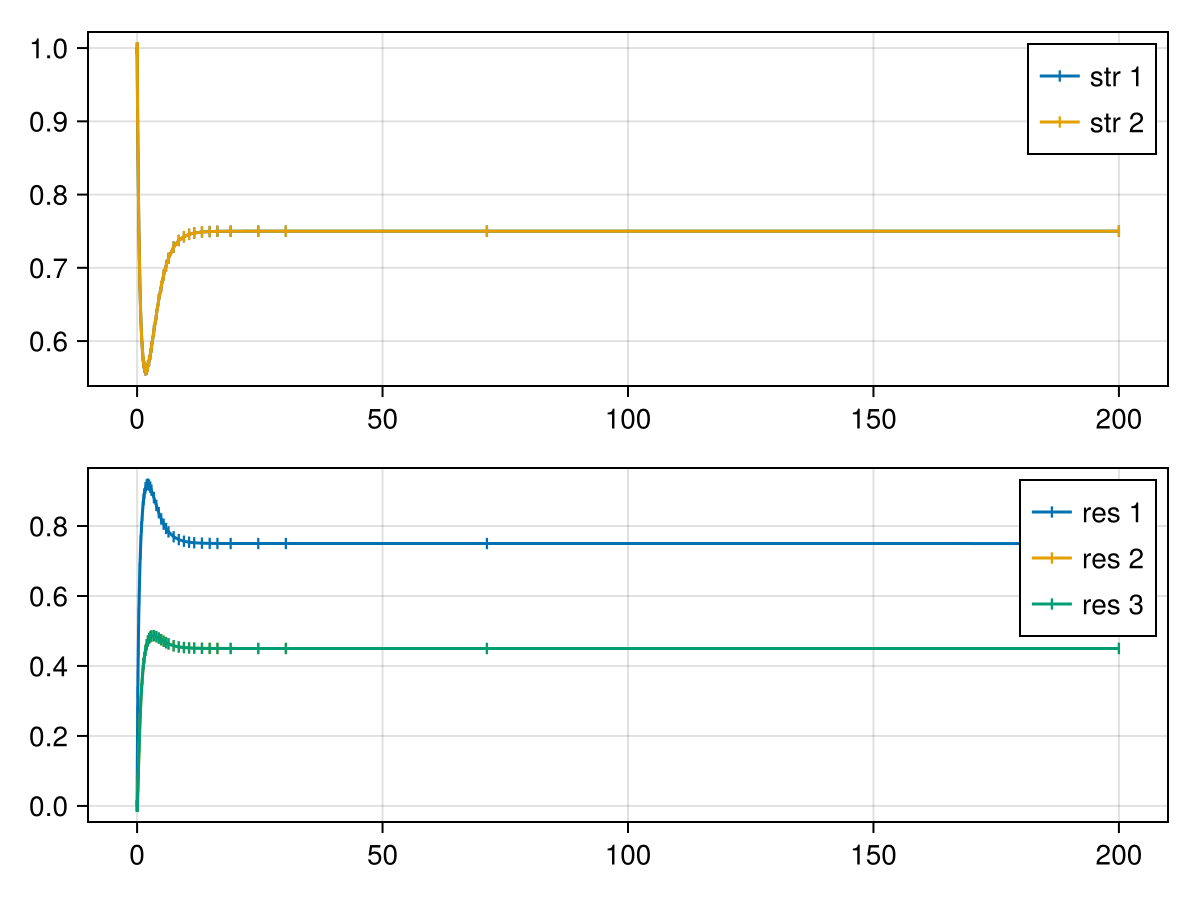

5-element Vector{Float64}:
 0.7500567884764349
 0.7500567884764349
 0.7499261224767086
 0.44998581480140554
 0.44998581480140554

In [4]:
D = fill(0., 2, 3, 3)
D[1,:,:] .= [0. 0. 0.; 0. 0. 0.; 1 0. 0.]
D[2,:,:] .= [0. 0. 0.; 1. 0. 0.; 0. 0. 0.]
params = make_sammicrmparams(2, 3;
    D=SArray{Tuple{2,3,3}}(D),
    K=[3., 0., 0.],
    r=[1., 1., 1.],
    l=[1. 0. 0.; 1. 0. 0.],
    c=[2. 2. 0.; 2. 0. 2.],
    m=[0.9, 0.9],
)

u0 = make_u0_smart(params;
    u0=[1., 1., 0., 0., 0.],
    u0rand=0.
)

p = make_mmicrm_problem(params, u0, 200)
s = solve(p, QNDF())

check_mmicrmparams(params)
display(plot_mmicrm_sol(s))
s[end]
# param_summary(p.p)

## Now lets do some random sampling

In [29]:
S = 20
M = 20

20

In [33]:
rsgj = RSGStevens1(S, M,1.,0.35
)
ps = rsgj();

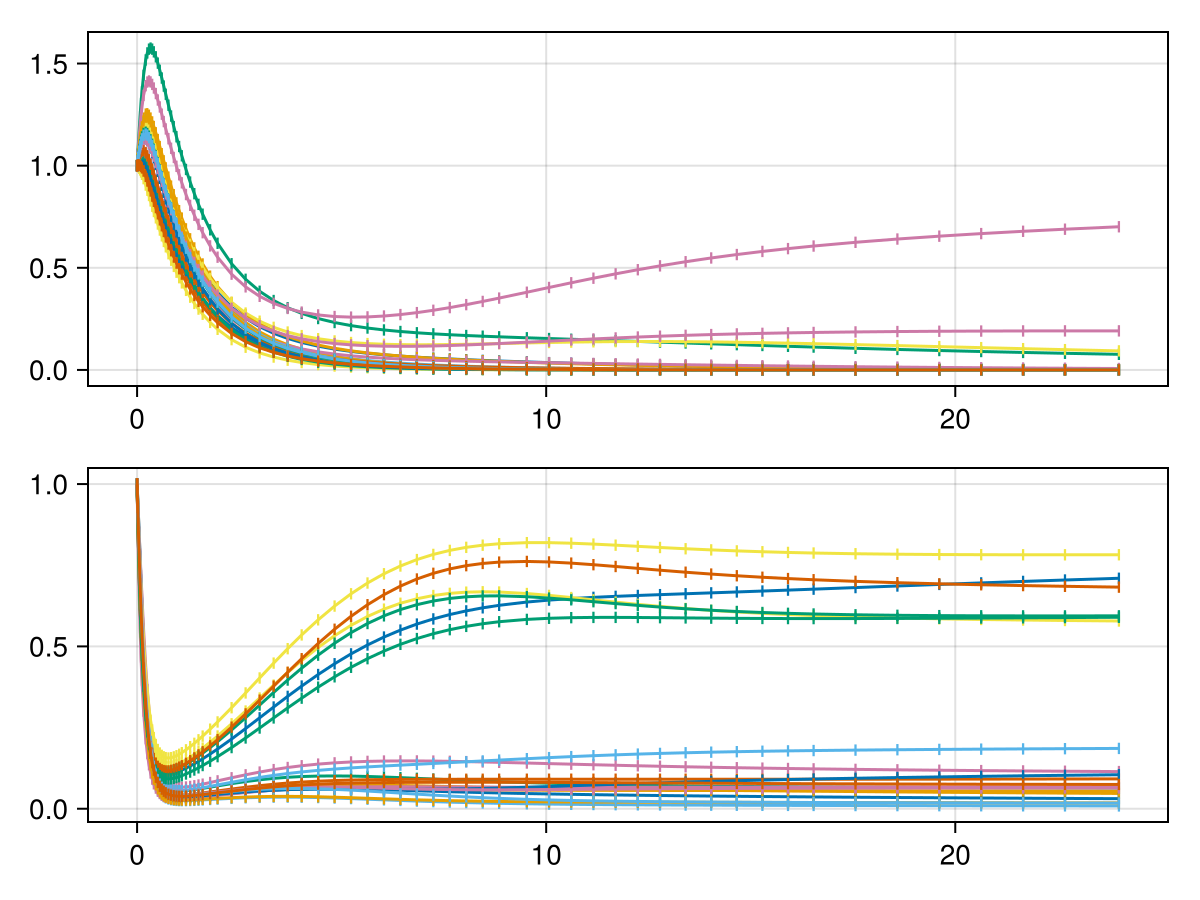

40-element Vector{Float64}:
  0.0024817321188709534
  0.002185834274527464
  0.07634973666129806
  0.7008095825216027
  4.8901217518190585e-5
  3.886506355226097e-6
 -9.953260897918827e-8
  1.0491412580567863e-5
  6.16834442702967e-6
  1.6201829326477063e-7
  ⋮
  0.18578815514868063
  0.6826046837057227
  0.7823387738108936
  0.10479575534026549
  0.01785309118267688
  0.5897215786855453
  0.06406066148987127
  0.01740476448191739
  0.0748468527966431

In [35]:
u0 = make_u0_smart(ps; u0=fill(1.,S+M))
p = make_mmicrm_problem(ps, u0, 24)
s = solve(p, QNDF())

check_mmicrmparams(params)
display(plot_mmicrm_sol(s))
s[end]

## And finally a basic batch culture

In [ ]:
# 160525 this is still chemostat. Got to change this soon.
S = 20
M = 20

rsgj = RSGStevens1(S, M,1.,0.35
)
ps = rsgj();


In [43]:
ps.mmicrm_params.K .= fill(0., M)
ps.mmicrm_params.r .= fill(0., M)

20-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

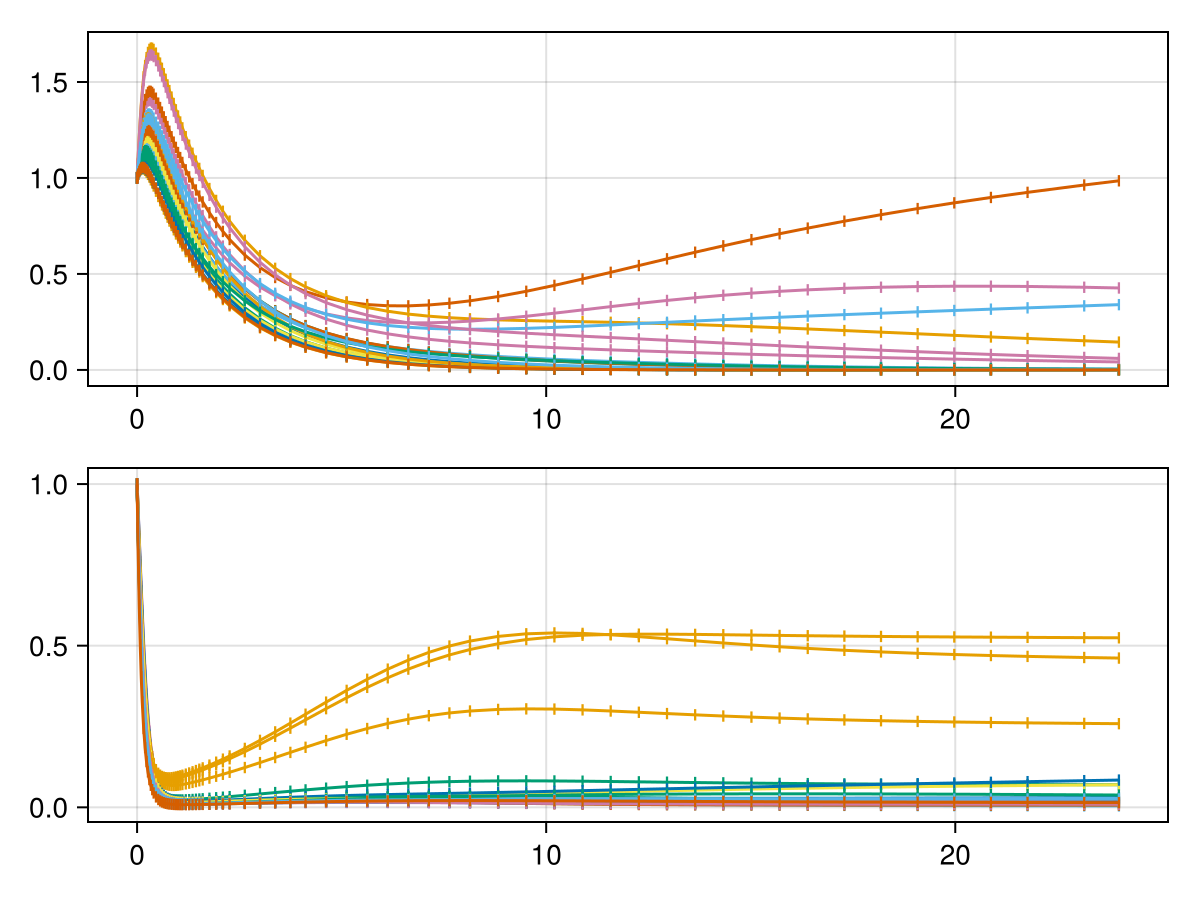

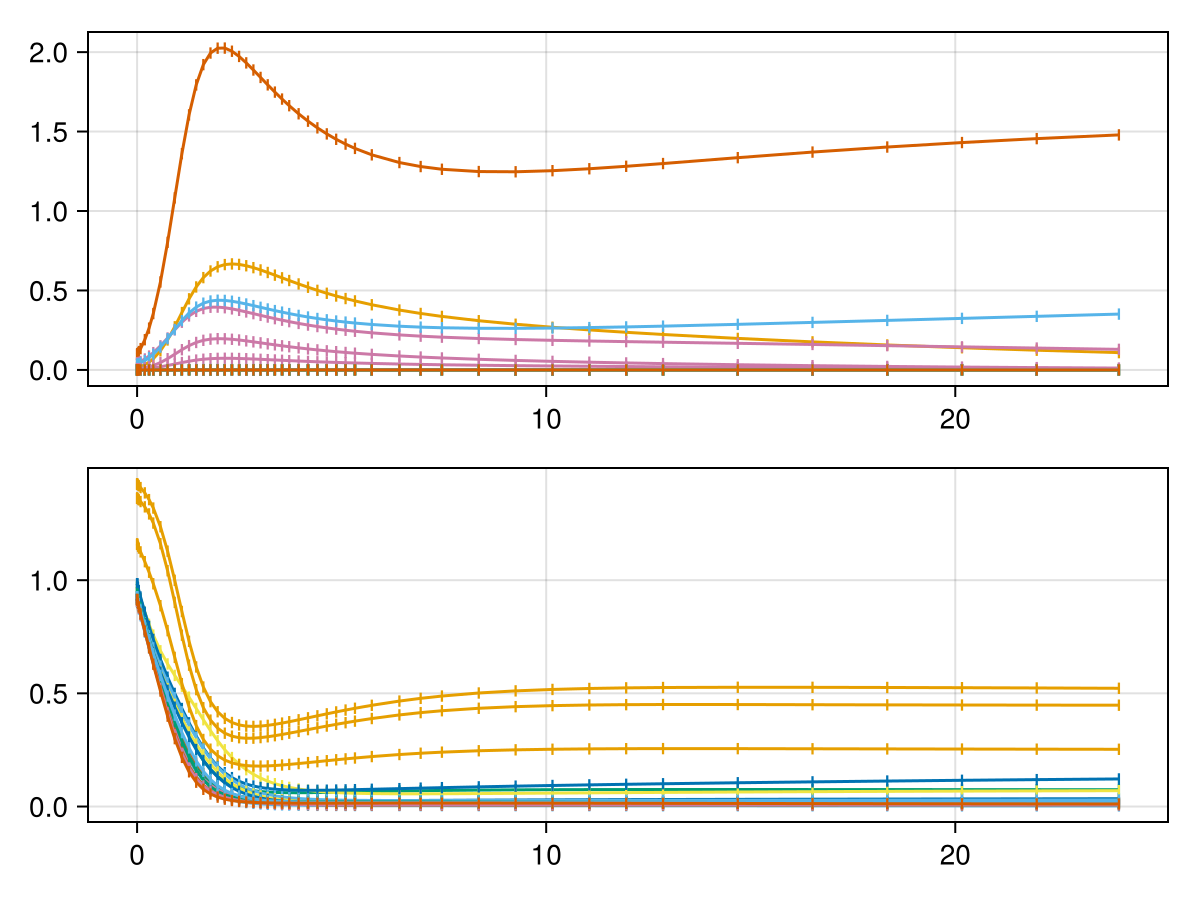

In [37]:
n_dil = 2
dilution_factor = 10
t_dil = 24

# the initial condition is the same for all dilutions
u = fill(1.,S+M)

abundances = fill(0., (S+M, n_dil+1))
abundances[:,1] = u

for i in 1:n_dil
    u0 = make_u0_smart(ps; u0=u)
    p = make_mmicrm_problem(ps, u0, 24)
    s = solve(p, QNDF())

    display(plot_mmicrm_sol(s))
    abundances[:,i+1] = s[end]

    u[1:S] = s[end][1:S]/dilution_factor
    u[S+1:end] = s[end][S+1:end].+fill(0.9, M)
end